# Classification Modeling 

In this project, we will build a classification model using K-Nearest Neighbors(KNN) and Decision Trees, utilizing the following dataset:  https://www.openml.org/d/1590

### Import files

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, fbeta_score, recall_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
data = pd.read_csv('./data/phpMawTba.csv')

## Data Cleaning

Since this file was initally mined by someone else, it was relatively clean and ordered.
There were some additional operations needed to put the data in the proper format and to type cast certain columns.

In [45]:
data.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United-States   <=50K  
1             0              50   United-States   <=50K  
2             0              40   United-States    >50K  
3             0              40   United-States    >50K  
4             0              30   United-States   <=50K

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [47]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [48]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

occupation
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-

In [49]:
## This line of code takes care of trailing and leading whitespace within series that contain string objects
for col in data.columns:
    try:
        data[col] = data[col].apply(lambda x: x.strip())
    except:
        continue
        
data.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [50]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Trans

In [51]:
data.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

### Visualization 

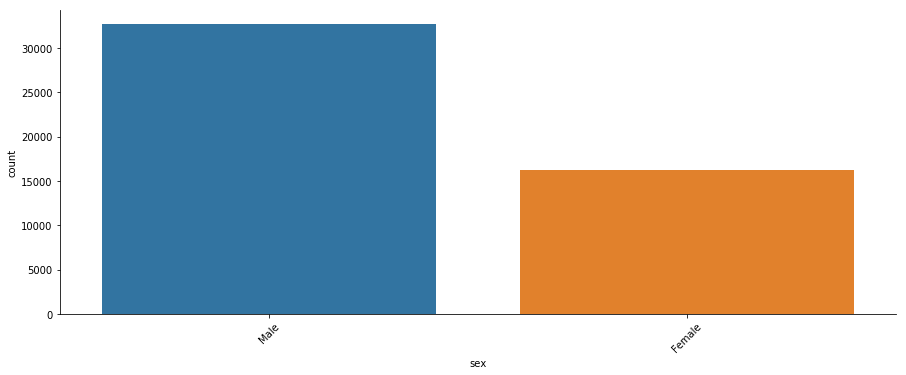

In [52]:
sns.catplot(x='sex', kind='count', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

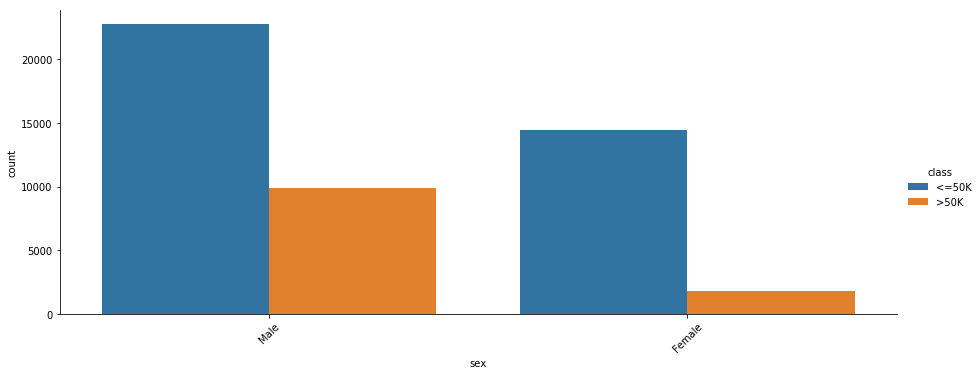

In [53]:
sns.catplot(x='sex', kind='count', hue='class', data=data, aspect=2.5, )
plt.xticks(rotation=45)
plt.show()

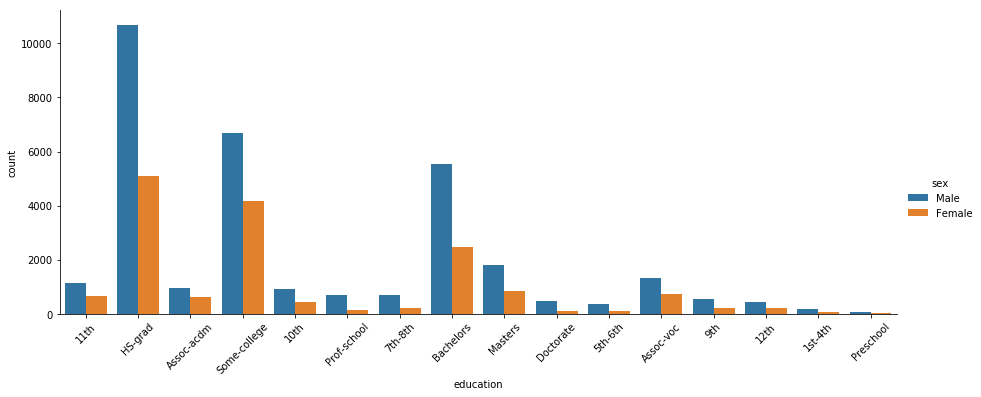

In [54]:
sns.catplot(x='education', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

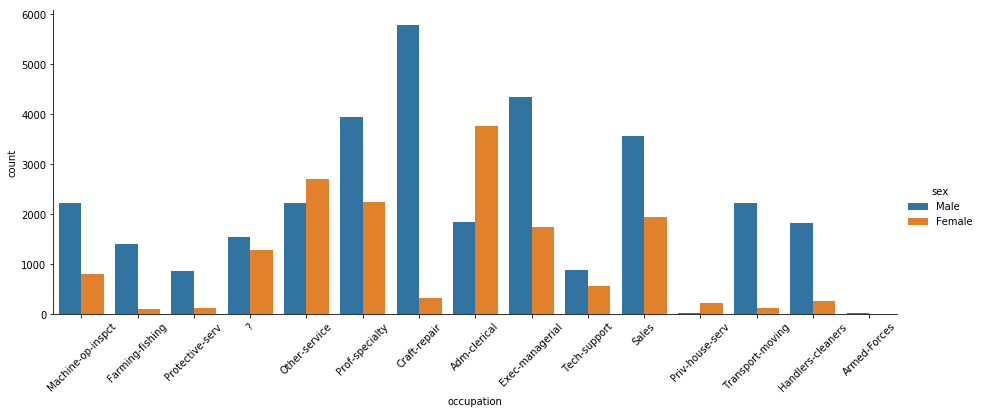

In [55]:
sns.catplot(x='occupation', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

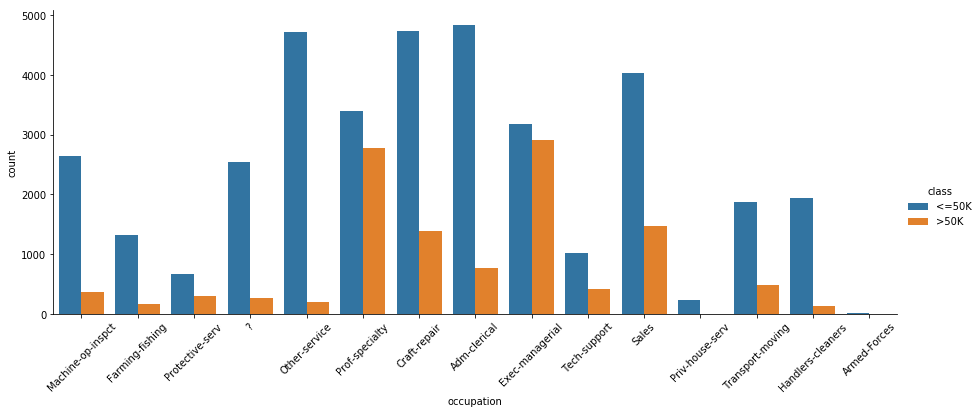

In [56]:
sns.catplot(x='occupation', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

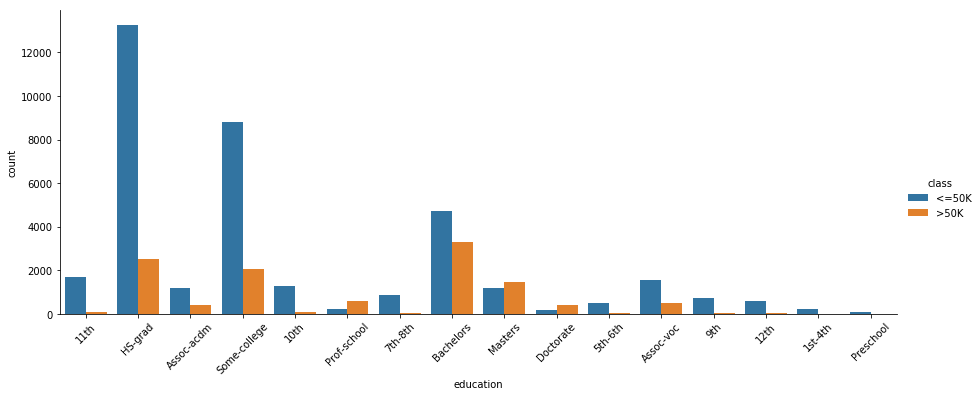

In [57]:
sns.catplot(x='education', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

# Classification modeling

In this section, we will create classification models using K-nearest neighbors and Decision Tree models.


### Setting up the data for modeling

In [58]:
def encode_cat_labels(df, cols=None):
    new_df = df.copy()
    refs = {}
    
    if cols == None:
        cols = [col for col in data.columns if data[col].dtype == 'object']
    
    for col in cols:
        le = preprocessing.LabelEncoder()
        le.fit(data[col])
        new_df[col] = le.transform(new_df[col])
        refs[col] = {k:v for (k,v) in zip(le.classes_, le.transform(le.classes_))}
    return new_df, refs

In [59]:
def calc_metrics(labels, preds, beta=0.5):
    
    metrics = {
        "precision": precision_score(labels, preds),
        "recall" : recall_score(labels, preds),
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "f_b": fbeta_score(labels, preds, beta=beta),
        "error": np.mean(labels != preds)
    }
    return metrics

In [60]:
# Get all of the string columns within the dataframe
cols = [col for col in data.columns if data[col].dtype == 'object']
model_df, col_refs= encode_cat_labels(data, cols)

col_refs

{'workclass': {'?': 0,
  'Federal-gov': 1,
  'Local-gov': 2,
  'Never-worked': 3,
  'Private': 4,
  'Self-emp-inc': 5,
  'Self-emp-not-inc': 6,
  'State-gov': 7,
  'Without-pay': 8},
 'education': {'10th': 0,
  '11th': 1,
  '12th': 2,
  '1st-4th': 3,
  '5th-6th': 4,
  '7th-8th': 5,
  '9th': 6,
  'Assoc-acdm': 7,
  'Assoc-voc': 8,
  'Bachelors': 9,
  'Doctorate': 10,
  'HS-grad': 11,
  'Masters': 12,
  'Preschool': 13,
  'Prof-school': 14,
  'Some-college': 15},
 'marital-status': {'Divorced': 0,
  'Married-AF-spouse': 1,
  'Married-civ-spouse': 2,
  'Married-spouse-absent': 3,
  'Never-married': 4,
  'Separated': 5,
  'Widowed': 6},
 'occupation': {'?': 0,
  'Adm-clerical': 1,
  'Armed-Forces': 2,
  'Craft-repair': 3,
  'Exec-managerial': 4,
  'Farming-fishing': 5,
  'Handlers-cleaners': 6,
  'Machine-op-inspct': 7,
  'Other-service': 8,
  'Priv-house-serv': 9,
  'Prof-specialty': 10,
  'Protective-serv': 11,
  'Sales': 12,
  'Tech-support': 13,
  'Transport-moving': 14},
 'relationshi

In [61]:
model_df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   25          4  226802          1              7               4   
1   38          4   89814         11              9               2   
2   28          2  336951          7             12               2   
3   44          4  160323         15             10               2   
4   18          0  103497         15             10               4   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           7             3     2    1             0             0   
1           5             0     4    1             0             0   
2          11             0     4    1             0             0   
3           7             0     2    1          7688             0   
4           0             3     4    0             0             0   

   hours-per-week  native-country  class  
0              40              39      0  
1              50              39      0  
2              40              39      1  
3              40              39      1  
4              30              39      0

In [62]:
target_name = 'class'
try:
    target = model_df[target_name]
    model_df.drop(labels=target_name, inplace=True, axis=1)
except:
    print(f'The target: {target_name}, has already been dropped from the dataframe')
    print(model_df.columns)

### Train Test Split

In [63]:
##Setting up the train_test split
x_train, x_test,y_train, y_test = train_test_split(model_df, 
                                                    target, test_size=0.35, random_state=42)

# Instantiate StandardScaler
scaler = preprocessing.StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(x_train)
scaled_data_test = scaler.transform(x_test)

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [64]:
x_train.shape, x_test.shape

((31747, 14), (17095, 14))

## K-nearest neighbors modeling

In [80]:
def generate_knn(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    neighbors = [] # list to hold metrics of the neighbors
    for k in range(min_k, max_k+1):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        metrics = calc_metrics(labels=y_test, preds=preds)
        
        metrics['k'] = k # append k_value to the calculated metrics
        neighbors.append(metrics)
          
    return neighbors

In [85]:
list_of_neighbors = generate_knn(x_train, y_train, x_test, y_test, max_k=50)

In [86]:
# Print the last 5 elements of the list
list_of_neighbors[-5:]

[{'precision': 0.9026217228464419,
  'recall': 0.17953811770548794,
  'accuracy': 0.8021643755484059,
  'f1': 0.29950289975144984,
  'f_b': 0.49993085327064035,
  'error': 0.19783562445159403,
  'k': 46},
 {'precision': 0.8990147783251231,
  'recall': 0.18127638440526447,
  'accuracy': 0.8023398654577362,
  'f1': 0.3017152304195082,
  'f_b': 0.5017182130584192,
  'error': 0.19766013454226383,
  'k': 47},
 {'precision': 0.9064102564102564,
  'recall': 0.17556493667742737,
  'accuracy': 0.8015209125475286,
  'f1': 0.2941543582275848,
  'f_b': 0.49461312438785504,
  'error': 0.19847908745247148,
  'k': 48},
 {'precision': 0.9021329987452948,
  'recall': 0.1785448224484728,
  'accuracy': 0.8019303890026324,
  'f1': 0.2980928689883913,
  'f_b': 0.4982674982674982,
  'error': 0.19806961099736764,
  'k': 49},
 {'precision': 0.9116094986807388,
  'recall': 0.17159175564936677,
  'accuracy': 0.8009359461830945,
  'f1': 0.2888192267502613,
  'f_b': 0.4894460971809038,
  'error': 0.19906405381690

In [87]:
def graph_knn_metrics(list_of_neighbors, fsize=(15,8)):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_neighbors:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
    
    # Graph the values within the list
    for key in keys:
        if key != 'k':
            plt.figure(figsize=fsize)
            plt.plot(graphs['k'], graphs[key], color='red', linestyle='dashed', marker='o',
                     markerfacecolor='blue', markersize=10)
            plt.grid()
            plt.title(f'{key.upper()}')
            plt.xlabel('K Value')
            plt.ylabel('Score')

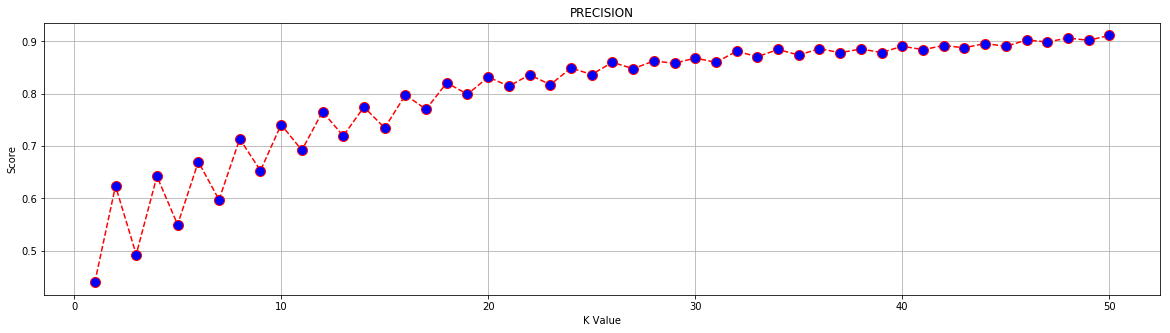

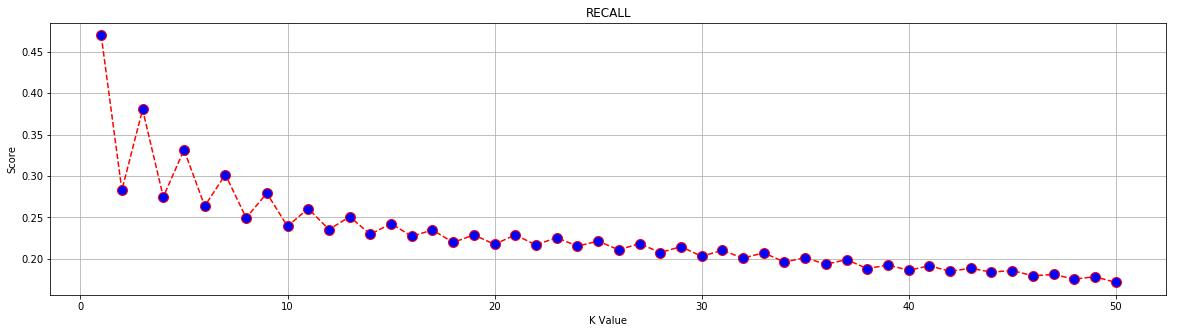

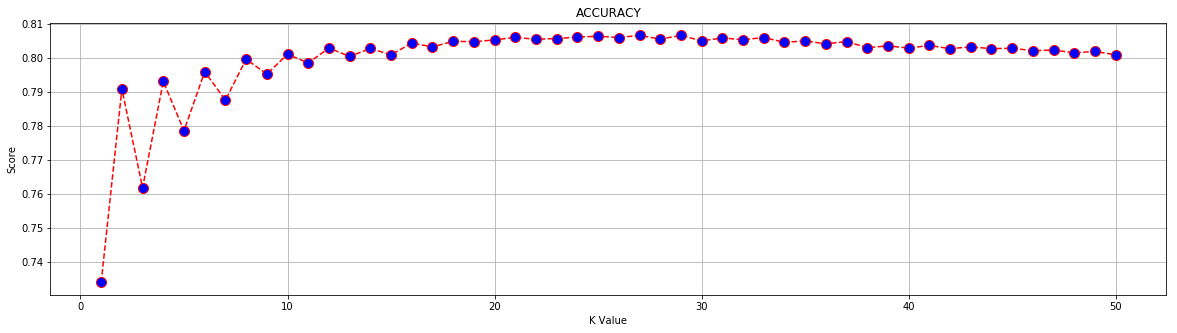

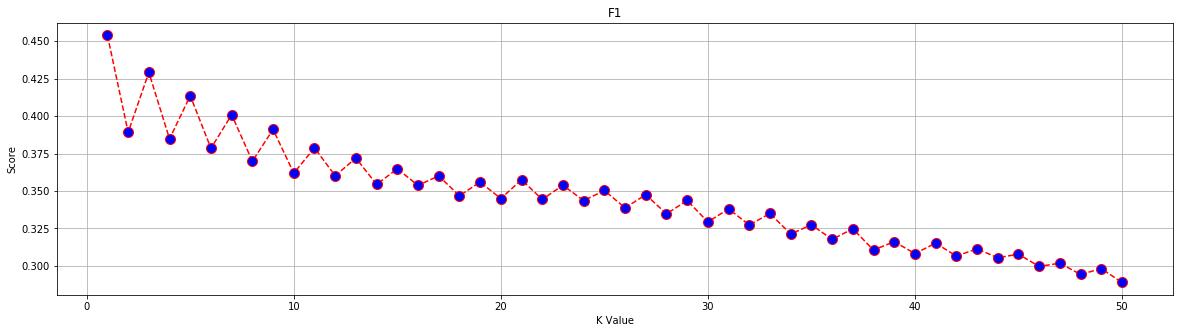

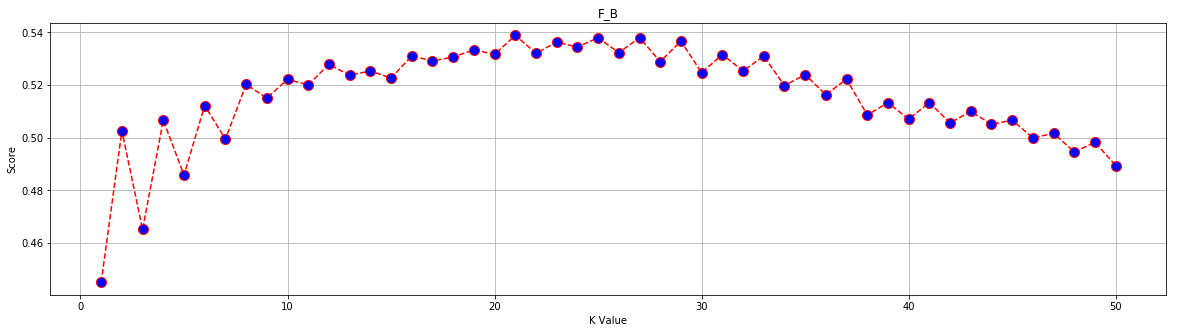

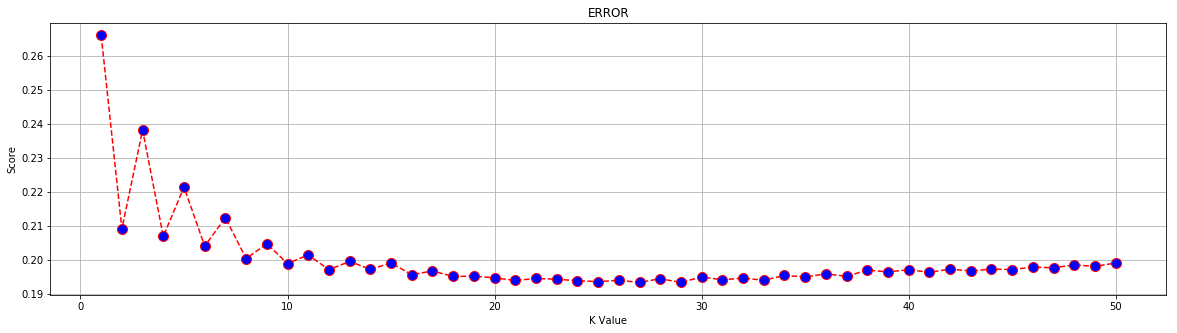

In [88]:
graph_knn_metrics(list_of_neighbors, fsize=(20,5))

## Decision Tree Modeling

In this section, we will setup a base decision tree and also attempt to increase the performance of the tree via the following hyper parametres: `max_depth` and `max_features`

#### Base decision tree

In [70]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
calc_metrics(y_test, y_preds)

{'precision': 0.6055871212121212,
 'recall': 0.635212316861187,
 'accuracy': 0.8166130447499269,
 'f1': 0.6200460550236334,
 'f_b': 0.6112890120919563,
 'error': 0.18338695525007312}

### Decision Tree with hyper parameter tunning: `max_features` 

In [71]:
def graph_dt_metrics(list_of_metrics, fsize=(15,8), title='', x_label=''):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_metrics:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
        
    # Graph the values within the list
    for key in keys:
        plt.figure(figsize=fsize)
        plt.plot(range(1, len(graphs[key])+1), graphs[key], color='blue', linestyle='dashed', marker='o',
                 markerfacecolor='red', markersize=10)
        plt.grid()
        plt.title(f'{title}\n{key.upper()}')
        plt.xlabel(x_label)
        plt.ylabel('score')

In [72]:
max_feat_metrics = []
for i in range(1, len(model_df.columns)+1 ):
    clf = DecisionTreeClassifier(criterion='entropy', max_features=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    max_feat_metrics.append(calc_metrics(y_test, y_preds))

max_feat_metrics

[{'precision': 0.5831348261076703,
  'recall': 0.6078966972932704,
  'accuracy': 0.8052646972799065,
  'f1': 0.595258358662614,
  'f_b': 0.5879244920505308,
  'error': 0.1947353027200936},
 {'precision': 0.6103736479842674,
  'recall': 0.616588030792153,
  'accuracy': 0.8169640245685873,
  'f1': 0.6134651019147622,
  'f_b': 0.611606483077984,
  'error': 0.1830359754314127},
 {'precision': 0.6058608058608058,
  'recall': 0.6160913831636454,
  'accuracy': 0.8151506288388418,
  'f1': 0.6109332676680621,
  'f_b': 0.6078796491400009,
  'error': 0.18484937116115824},
 {'precision': 0.6171538092956397,
  'recall': 0.6396821455177552,
  'accuracy': 0.8216437554840597,
  'f1': 0.628216071210828,
  'f_b': 0.6215316315205327,
  'error': 0.17835624451594034},
 {'precision': 0.6182123978856319,
  'recall': 0.6389371740749938,
  'accuracy': 0.82199473530272,
  'f1': 0.6284039565270485,
  'f_b': 0.6222490931076179,
  'error': 0.1780052646972799},
 {'precision': 0.6154031287605295,
  'recall': 0.63496

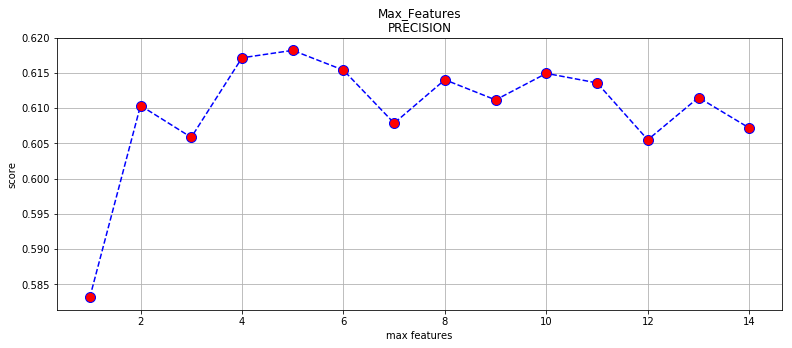

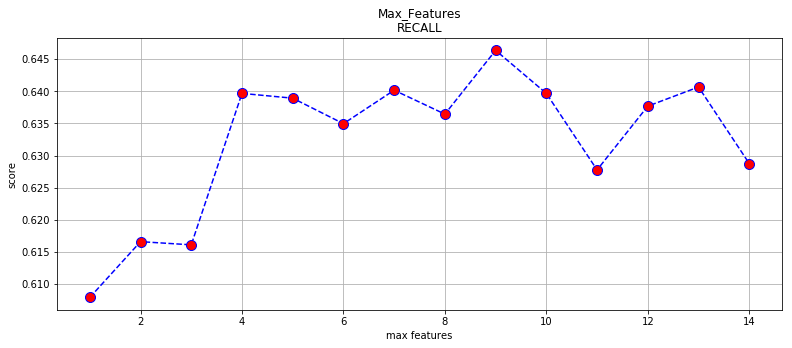

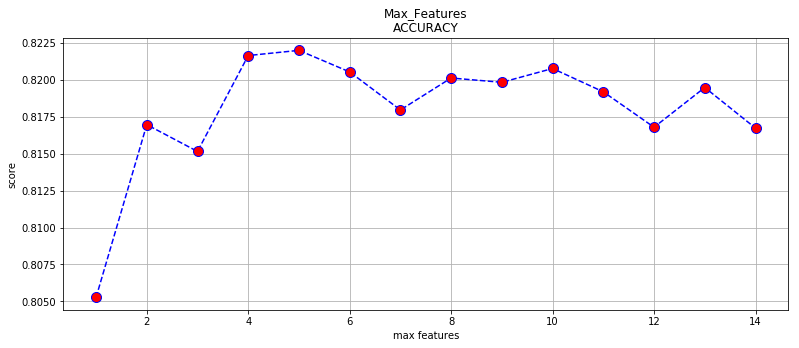

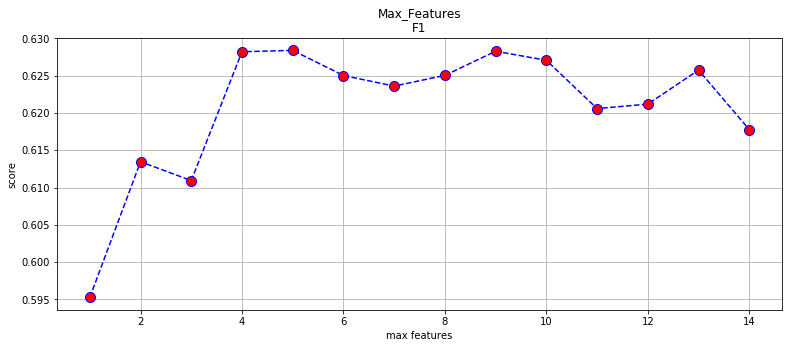

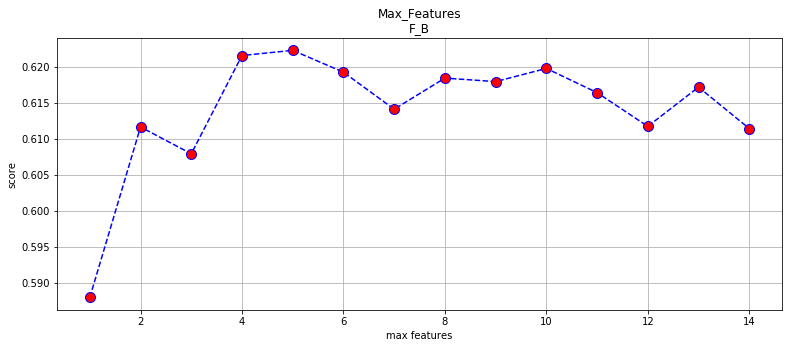

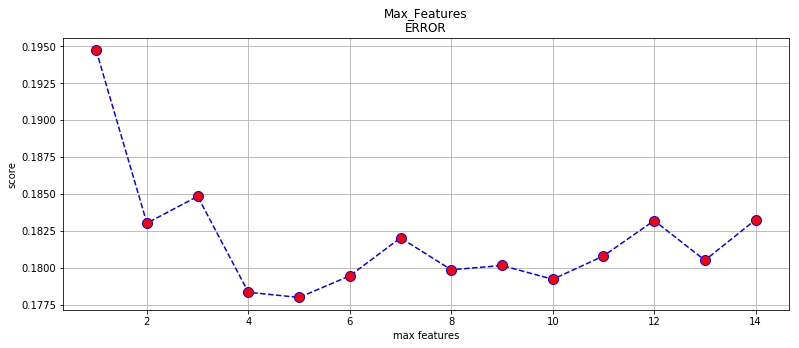

In [73]:
graph_dt_metrics(max_feat_metrics, fsize=(13,5), title='Max_Features', x_label='max features')

### Decision Tree hyper parameter tunning: `max_depth`

In [74]:
max_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    max_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


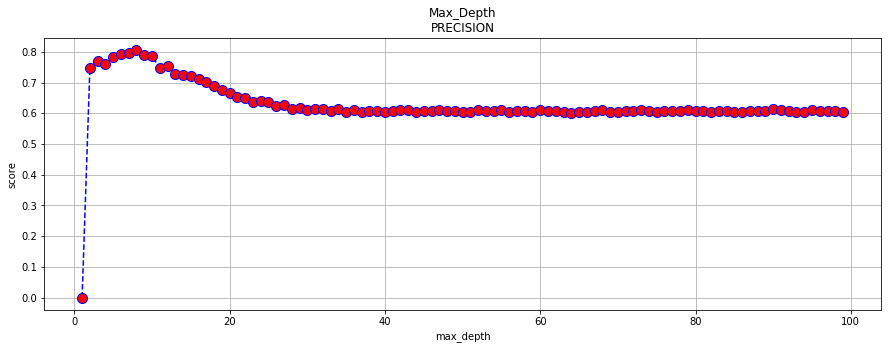

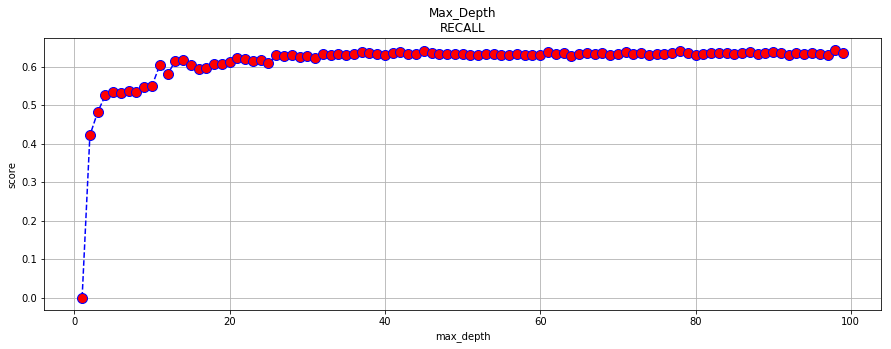

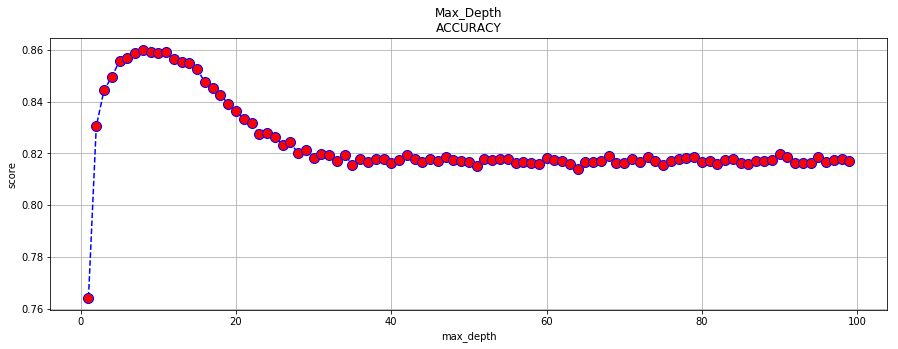

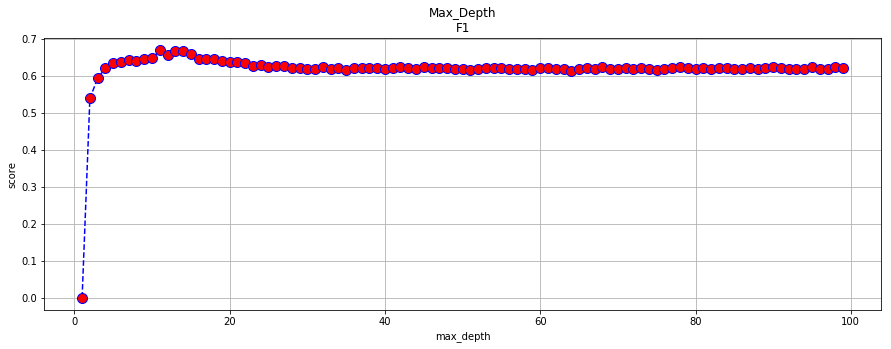

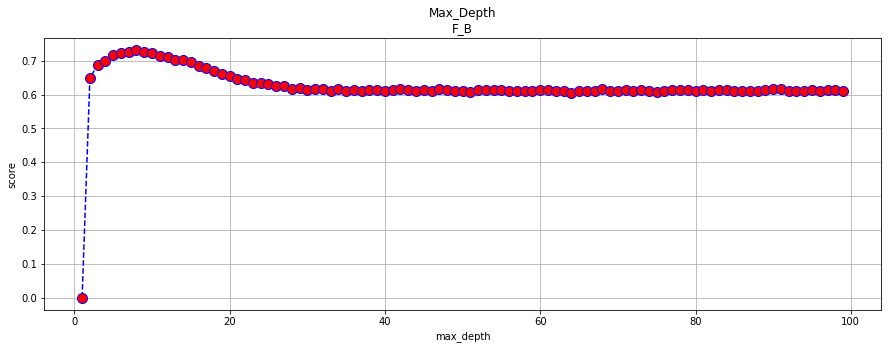

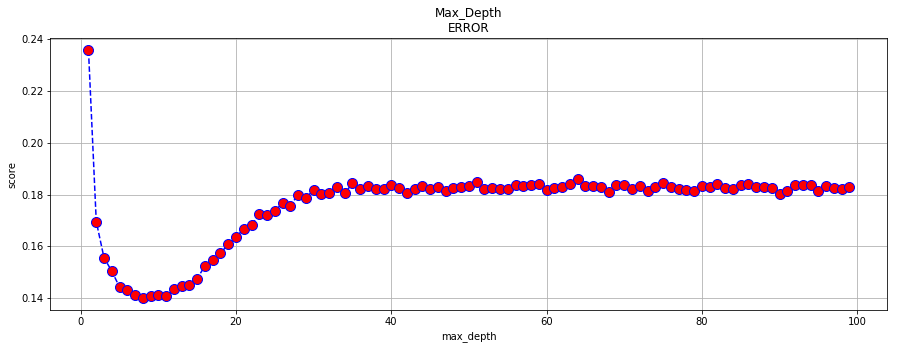

In [75]:
graph_dt_metrics(max_depth_metrics, fsize=(15,5), title='Max_Depth', x_label='max_depth')

### Decision tree hyper parameter tunning: `max_features: 12` & `max_depth`

In [76]:
feat_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=12)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    feat_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


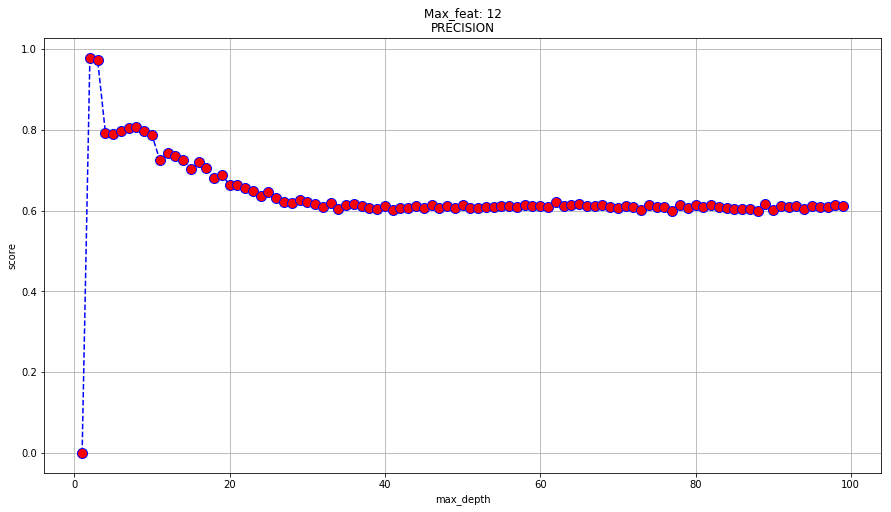

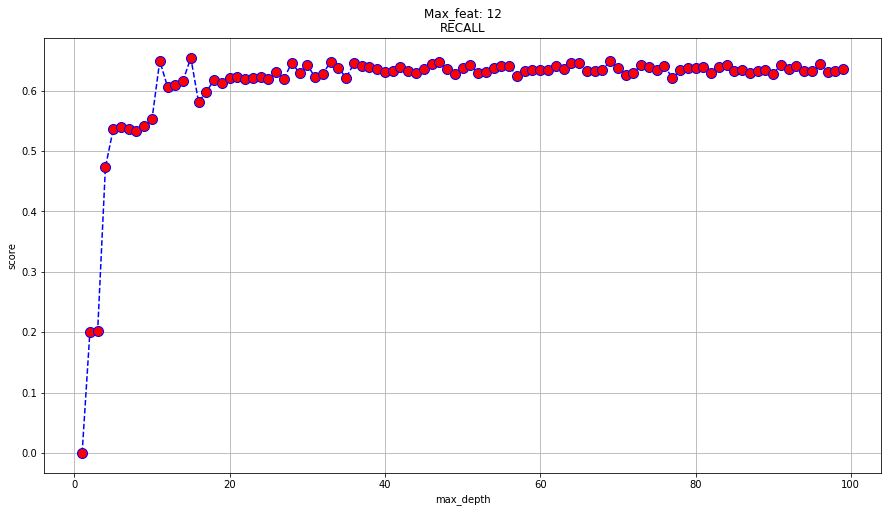

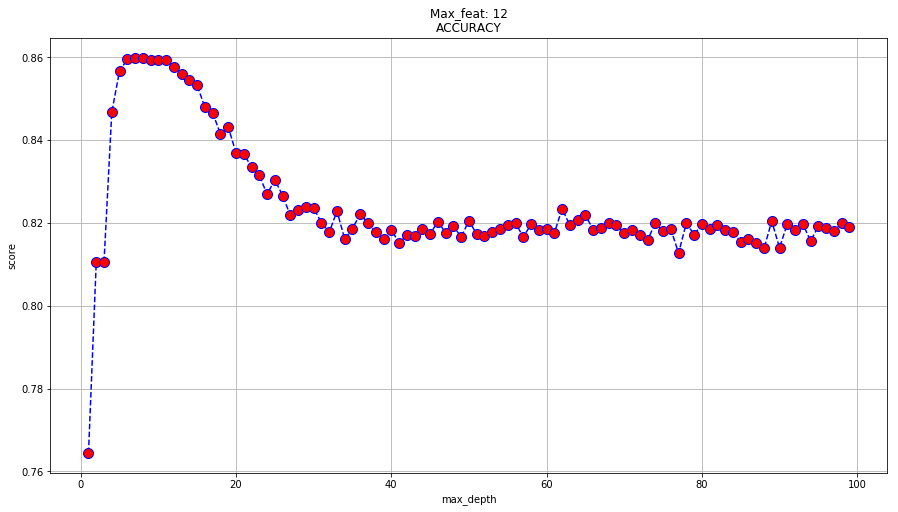

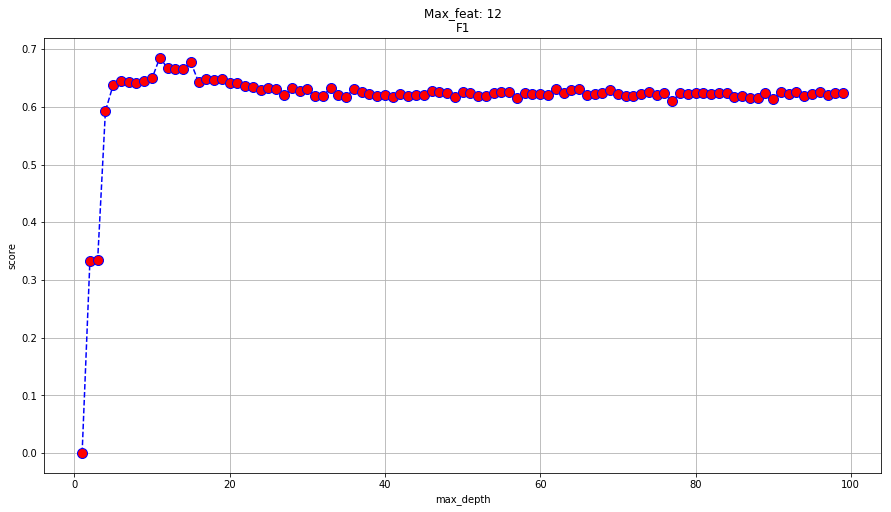

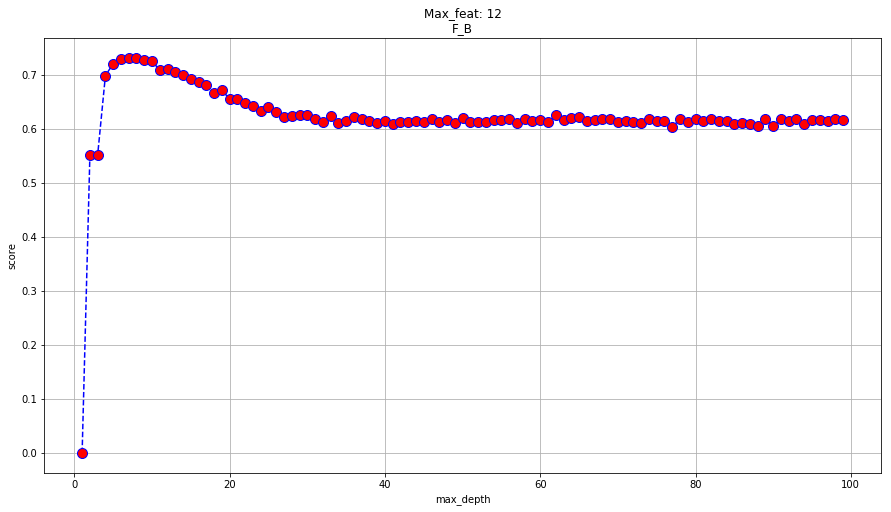

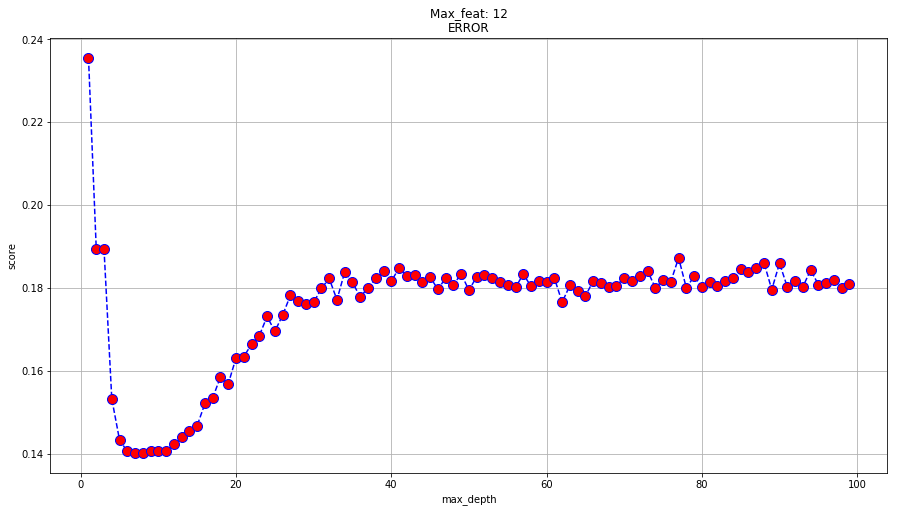

In [77]:
graph_dt_metrics(feat_depth_metrics, title="Max_feat: 12", x_label='max_depth')

In [78]:
feat_depth_metrics[10]

{'precision': 0.7253052164261932,
 'recall': 0.6491184504593991,
 'accuracy': 0.859432582626499,
 'f1': 0.6851002489844057,
 'f_b': 0.7086699560808979,
 'error': 0.14056741737350104}

# Summary

In this project, we sought to create a classification model using K-Nearest Neighbors and Decision Trees.  The packages used to model these

### KNN

The KNN model produced strong results.  The highest overall metrics were seen in .  Since this modeling technique utilizes voting, the decision was made to only utilize odd values when calculating the nearest neighbors.

One thing that was noted was that the precision of our model increased as more values were used for k.  I am not sure as to what may have caused this.  This modeling technique performed well with regards to precision, lowest error rate, and accuracy, but did poorly the remaining measures

### Decision Trees 

The best overall results within our Decision Tree Modeling utilized the following hyper parameters: `max_depth: 11` & `max_features: 12`. It is important to note that this tree did not have the highest score in each respective measure.  As different combinations were added, some measure increased, while others decreased. I decided to pick the tree with the smallest overall margin of change in the measures used.  

We used an iterative process to find the best combination of these hyper parameters that would give us an optimum decision tree. Although there are many combinations of hyper parameters that could be used, we decided to only use max_depth and max_features, to simplify the project.

Below are the overall scores of the decision

In [90]:
feat_depth_metrics[10]

{'precision': 0.7253052164261932,
 'recall': 0.6491184504593991,
 'accuracy': 0.859432582626499,
 'f1': 0.6851002489844057,
 'f_b': 0.7086699560808979,
 'error': 0.14056741737350104}

### Conclusion

The Decision Tree that resulted from our hyper parameter tunning that gave the overall best performance and the most consistent results.  Our KNN Model has some very interesting results and unexpected results.  More research would have to be done to determine the cause of the these results.  We were able to accurately predict 86% of our test data.

## Future Works

Possible future addition, or editions, to this project include the following:
* Pulling more recent data to see how demographics have increased over the years
* Web scrapping with the census bureau website to automatically update the data used.